# Tips and Tricks for Fast Data Analysis in Python
#### By Matthew Gerardino

---

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

## Read-in Data

In [2]:
url = 'https://raw.githubusercontent.com/rebecca-vickery/machine-learning-tutorials/master/pandas-tutorials/adults_data.csv'
data = pd.read_csv(url)

## Head()
#### It is best to always call your dataset to insure it was properly loaded in

In [3]:
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Describe
#### The ```describe()``` function allows us to very quickly look at some basic descriptive statistics for the numerical features in the dataset

In [4]:
data.describe()

,Unnamed: 0,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8140.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16280.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24420.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Value counts
#### The ```value_counts()``` function provides a very simple way to view the sum of the unique values in a column

In [5]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

#### A visual of the code above using a bar graph

<AxesSubplot:title={'center':'Marital Status'}>

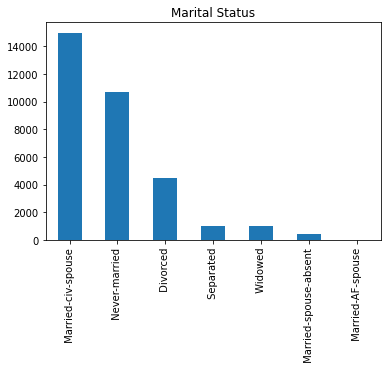

In [6]:
plt.title('Marital Status')
data['marital-status'].value_counts().plot.bar()

## Selecting Inappropriate visuals
#### Notice that not all columns are created equal when making visuals,
#### be aware of this when presenting the facts.

<AxesSubplot:title={'center':'Native Country'}>

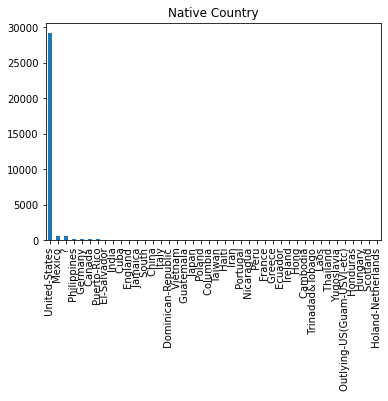

In [7]:
plt.title('Native Country')
data['native-country'].value_counts().plot.bar()

## nlargest()
#### We can combat this by using the ```nlargest()``` funtion, we can select the largest values in a given column to graph for this, we will select the <mark>10 largest values</mark> in our columnn.

<AxesSubplot:title={'center':'Native Country'}>

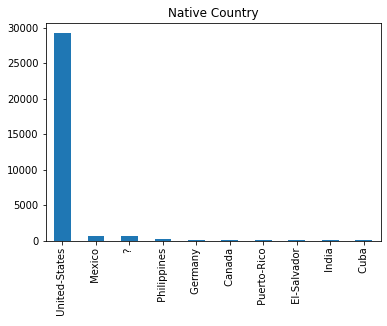

In [8]:
plt.title('Native Country')
data['native-country'].value_counts().nlargest(10).plot.bar()

## Groupby
#### The pandas groupby function is useful when comparing segments of a given column, in this example we will be viewing our column as two income groups

In [9]:
round(data.groupby(['income']).mean(),2)

,Unnamed: 0,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,,
<=50K,16251.39,36.78,190340.87,9.60,148.75,53.14,38.84
>50K,16370.19,44.25,188005.00,11.61,4006.14,195.00,45.47


## Boxplot viz of this info
#### A better way to compare the differences would be to view the variance in distributions for the two groups. A boxplot is a useful way to do that.

 <=50K         AxesSubplot(0.1,0.15;0.363636x0.75)
 >50K     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

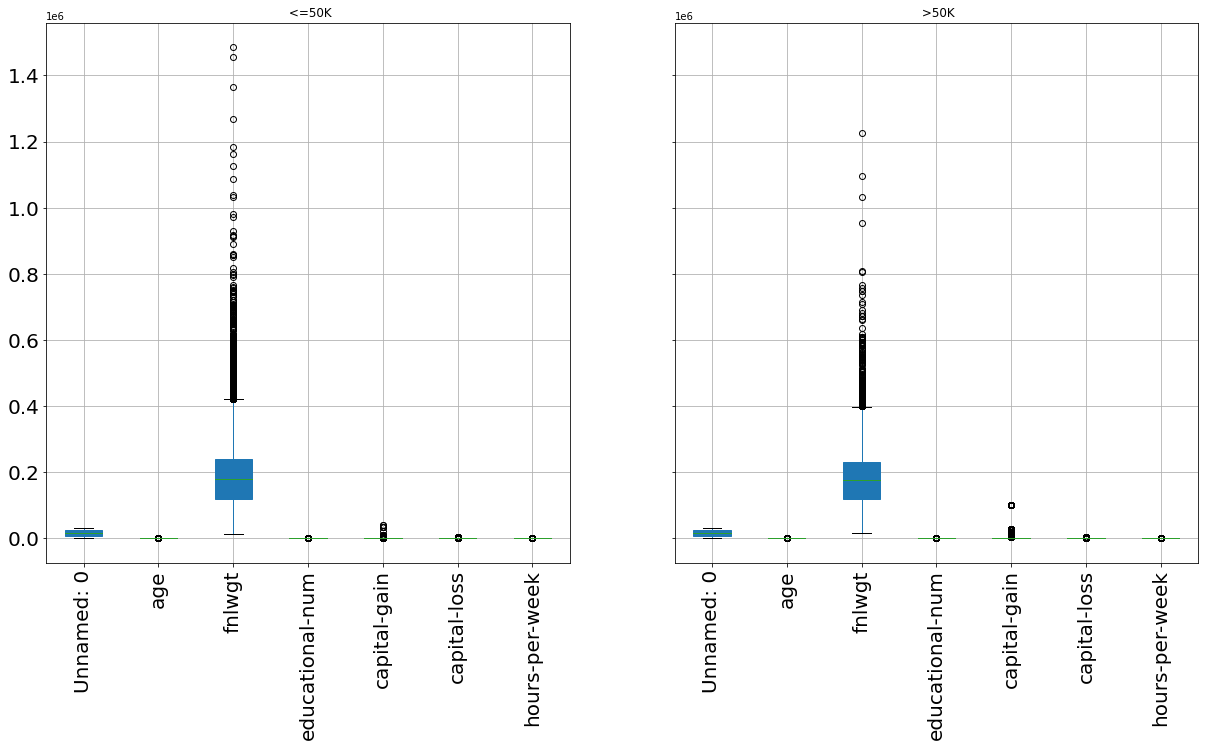

In [10]:
data.groupby('income').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

## [Scikit-learn MinMaxScaler Function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler)
#### Notice above that the values are on different scales. It is difficult to compare the two distributions. To overcome this we can scale the values.

 <=50K         AxesSubplot(0.1,0.15;0.363636x0.75)
 >50K     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

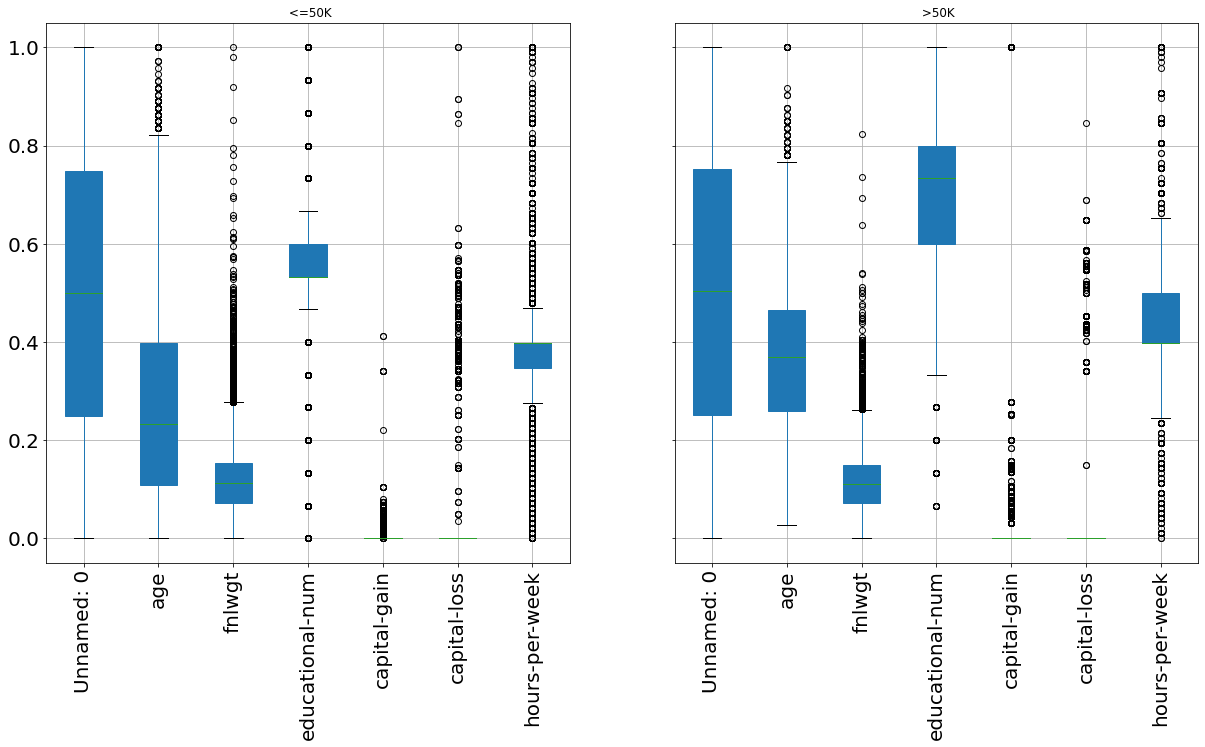

In [11]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
numeric_data = data[numeric_features]
categorical_data = data[categorical_features]
x = numeric_data.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numeric_data = pd.DataFrame(x_scaled, columns=numeric_data.columns)
data_transformed = pd.concat([numeric_data, categorical_data], axis=1)
data_transformed.groupby('income').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

## Horizontal Bar Chart
#### We can also use the groupby function to compare categorical features.

<AxesSubplot:ylabel='gender'>

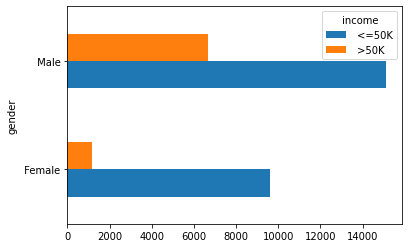

In [12]:
data.groupby('income').gender.value_counts().unstack(0).plot.barh()

## Pivot Tables
#### Pivot tables allow you to quickly summarise, group and filter data to perform more complex analyses

In [13]:
pivot_workclass = pd.pivot_table(data, values=['hours-per-week'],
                                 index = 'gender',
                                 columns = 'income', aggfunc=np.mean, fill_value=0)
pivot_workclass

hours-per-week           
income           <=50K       >50K
gender                           
 Female      35.916701  40.426633
 Male        40.693879  46.366106

## Ploting our Pivot Table
#### We can even add a plotting functionality to make our pivot table easier to visualise

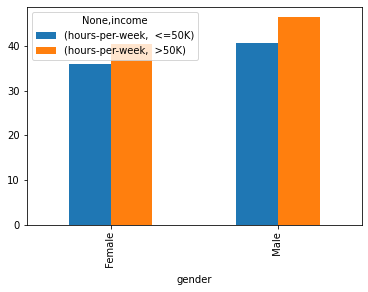

In [14]:
pivot_workclass = pd.pivot_table(data, values=['hours-per-week'],
                                 index = 'gender',
                                 columns = 'income', aggfunc=np.mean, fill_value=0).plot.bar()